The following shows the second order damping system.
$Y(s)/Y_{cmd}(s)$

/tmp/ipykernel_937510/948253541.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


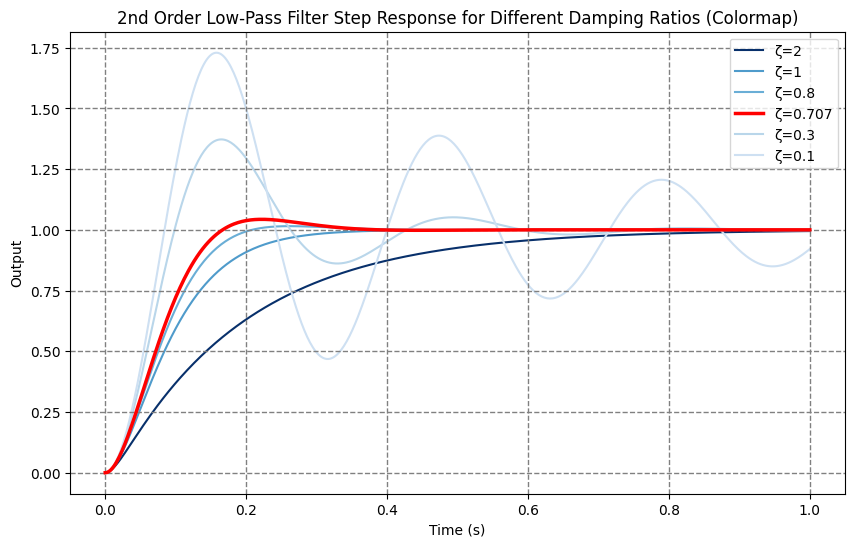

In [13]:
# secord.py - demonstrate some standard MATLAB commands
# RMM, 25 May 09
%matplotlib inline
# 2nd order low-pass filter step response for different damping ratios (colormap, standard interface)
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import tf, step
from matplotlib import cm

plt.figure(figsize=(10, 6))
wn = 20.0  # natural frequency
damping_list = [2, 1, 0.8, 0.707, 0.3, 0.1]
t = np.linspace(0, 1, 500)
# Use a standard colormap (e.g., viridis) to map damping ratios to colors
norm = plt.Normalize(min(damping_list) - 0.5, max(damping_list))
cmap = cm.get_cmap("Blues")
for zeta in damping_list:
    if zeta == 0.707:
        color = "red"
        lw = 2.5
        zorder = 10
    else:
        color = cmap(norm(zeta))
        lw = 1.5
        zorder = 1
    sys = tf([wn**2], [1, 2 * zeta * wn, wn**2])
    y, t_out = step(sys, T=t)
    plt.plot(t_out, y, color=color, label=f"ζ={zeta}", linewidth=lw, zorder=zorder)
plt.title(
    "2nd Order Low-Pass Filter Step Response for Different Damping Ratios (Colormap)"
)
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid(True, color="gray", linestyle="--", linewidth=1.0)
plt.legend()
plt.show()

First order Gradient of step-reponse.

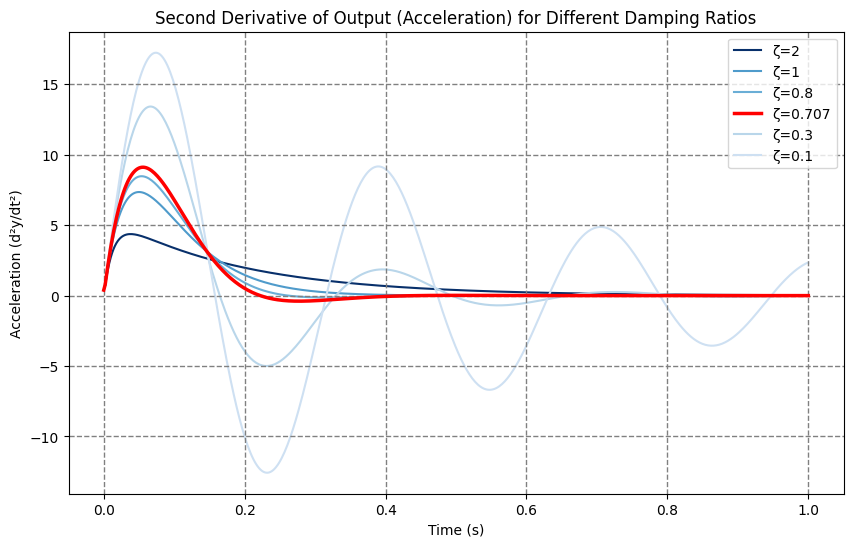

In [15]:
# Plot the first derivative of y (acceleration) for different damping ratios
plt.figure(figsize=(10, 6))
for zeta in damping_list:
    sys = tf([wn**2], [1, 2 * zeta * wn, wn**2])
    y, t_out = step(sys, T=t)
    # Compute second derivative using numpy gradient twice
    dy_dt = np.gradient(y, t_out)
    if zeta == 0.707:
        color = "red"
        lw = 2.5
        zorder = 10
    else:
        color = cmap(norm(zeta))
        lw = 1.5
        zorder = 1
    plt.plot(t_out, dy_dt, color=color, label=f"ζ={zeta}", linewidth=lw, zorder=zorder)
plt.title("Second Derivative of Output (Acceleration) for Different Damping Ratios")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (d²y/dt²)")
plt.grid(True, color="gray", linestyle="--", linewidth=1.0)
plt.legend()
plt.show()

Second order Gradient of step-reponse.

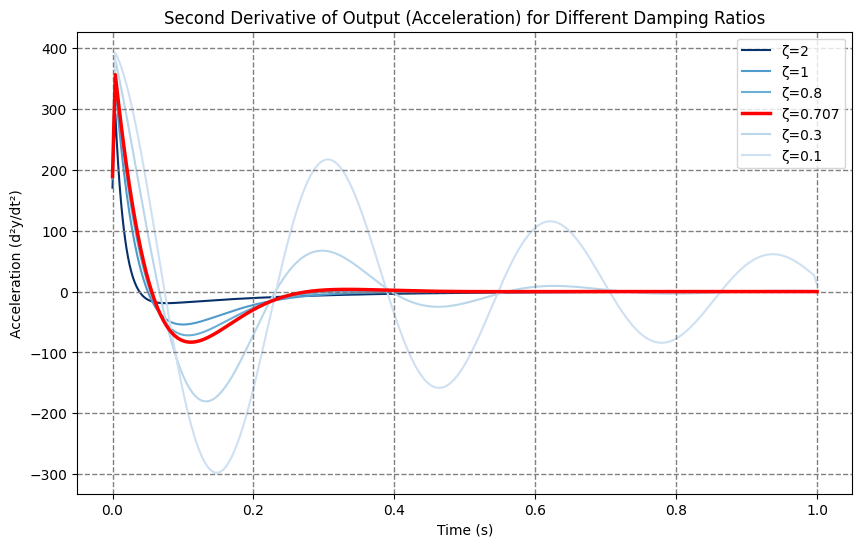

In [14]:
# Plot the second derivative of y (acceleration) for different damping ratios
plt.figure(figsize=(10, 6))
for zeta in damping_list:
    sys = tf([wn**2], [1, 2 * zeta * wn, wn**2])
    y, t_out = step(sys, T=t)
    # Compute second derivative using numpy gradient twice
    dy_dt = np.gradient(y, t_out)
    d2y_dt2 = np.gradient(dy_dt, t_out)
    if zeta == 0.707:
        color = "red"
        lw = 2.5
        zorder = 10
    else:
        color = cmap(norm(zeta))
        lw = 1.5
        zorder = 1
    plt.plot(
        t_out, d2y_dt2, color=color, label=f"ζ={zeta}", linewidth=lw, zorder=zorder
    )
plt.title("Second Derivative of Output (Acceleration) for Different Damping Ratios")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (d²y/dt²)")
plt.grid(True, color="gray", linestyle="--", linewidth=1.0)
plt.legend()
plt.show()